In [3]:
import math
import os
import os.path as op
import mne_bids
import scipy.stats
import sklearn.metrics
from mne.datasets import sample
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

import data_extracts
import ml_algorithms
import patients_matrix
import test2
from patients_matrix import PatientsMatrix
import connectivity_matrix
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import levene, gaussian_kde
from scipy.stats import anderson
import scipy.stats as stats
import seaborn as sns
import test1
import random

freq_dict = {
    'delta': (1, 4),
    'theta': (4, 8),
    'alpha': (8, 12),
    'beta': (12, 30),
    'low_gamma': (30, 70),
    'high_gamma': (70, 250),
    'plv': (5,5) 
}

In [9]:
import pandas as pd
import bids_extract
dataset = "ds003688"
participants_path = op.join(bids_extract.get_bidsroot(dataset), 'participants.tsv')

        # read participants.tsv file
participants = pd.read_csv(participants_path, sep='\t')
participants = participants['participant_id']
participants = participants[:][-2:]
print(participants)

61    sub-62
62    sub-63
Name: participant_id, dtype: object


In [ ]:
np.random.seed(None)
cm_percentage_maj = np.zeros((2,2))
for i in range(5):
    np.random.seed(None)
    seed = random.randint(1,10000)
    y_test_majority, y_pred_majority = test2.test_all_patient_majority_vote(ml_algorithms.random_forest, data_extracts.max_indices,1
                                             ,np.arange(45),seed=seed)
    cm = confusion_matrix(y_test_majority, y_pred_majority, labels=[0, 1])
    cm_percentage_maj += cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

delta
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)


Traceback (most recent call last):
  File "C:\Users\Eyal Arad\Documents\GitHub\brainProj\venvBp\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Eyal Arad\AppData\Local\Temp\ipykernel_44316\2186389925.py", line 6, in <module>
  File "C:\Users\Eyal Arad\Documents\GitHub\brainProj\test2.py", line 96, in test_all_patient_majority_vote
    model = model_type(x_train, y_train)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Eyal Arad\Documents\GitHub\brainProj\ml_algorithms.py", line 66, in random_forest
    model.fit(x_train, y_train)
  File "C:\Users\Eyal Arad\Documents\GitHub\brainProj\venvBp\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Eyal Arad\Documents\GitHub\brainProj\venvBp\Lib\site-packages\sklearn\ensemble\_forest.py", line 489, in fit
    trees 

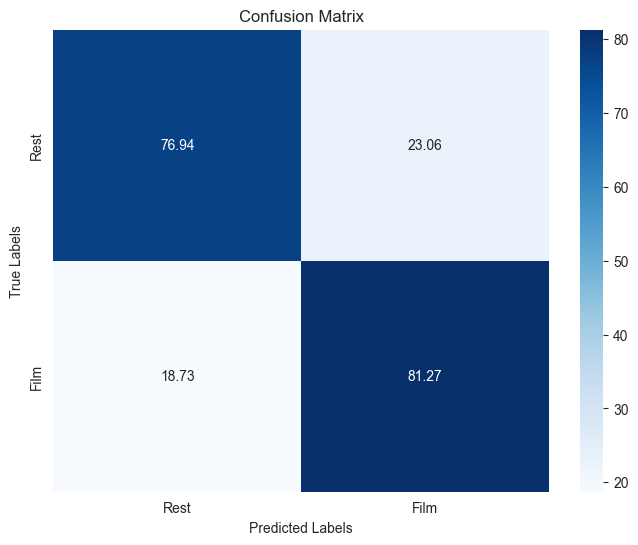

In [12]:
cm_mean = cm_percentage_maj/5
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mean, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Rest', 'Film'],
            yticklabels=['Rest', 'Film'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest, Majority vote on Coherence')
plt.show()

In [6]:
np.random.seed(None)
cm_percentage = np.zeros((2,2))
for i in range(5):
    y_test, y_pred = test2.test_all_patients(ml_algorithms.random_forest, data_extracts.max_indices,'plv',1
                                             ,np.arange(45))
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    cm_percentage += cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

In [7]:
cm_percentage

array([[353.75550407, 146.24449593],
       [158.03932656, 341.96067344]])

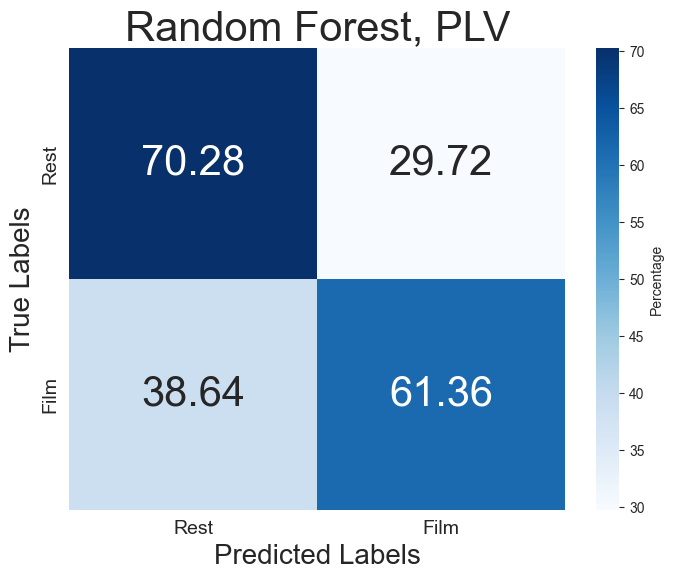

In [22]:

cm_temp = cm_percentage/5
plt.figure(figsize=(8, 6))
sns.heatmap(cm_temp, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Rest', 'Film'],
            yticklabels=['Rest', 'Film'],
            annot_kws={"size": 30},  # Larger annotation (percentage) text
            cbar_kws={'label': 'Percentage'})
plt.xlabel('Predicted Labels',fontsize=20)
plt.ylabel('True Labels',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Random Forest, PLV',fontsize=30)
plt.show()

In [16]:
acc_all = []
for freq in freq_dict.keys():
    y_test,y_pred = test2.test_all_patients(ml_algorithms.random_forest, data_extracts.max_values,freq ,1 ,np.arange(45))
    acc_all.append(accuracy_score(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))

0.5116211504938989
0.5241138872748402
0.520918070889018
0.5244044160371877
0.5197559558396281
0.5310865775711795
0.5337013364323068


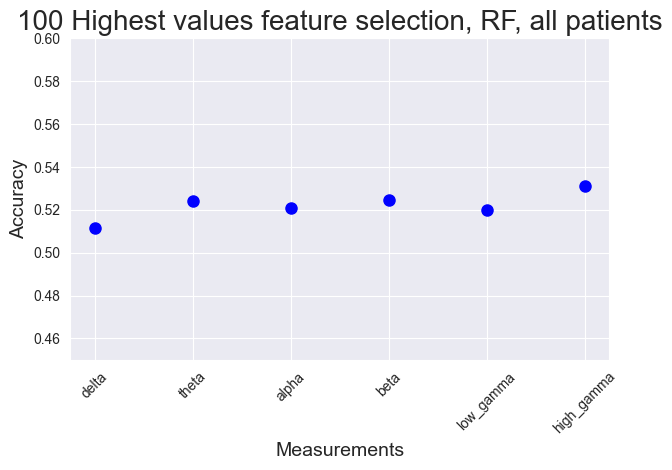

In [17]:
plt.plot(list(freq_dict.keys())[:-1], acc_all[:-1], marker='o', color='b', linestyle='None', markersize=8)

# Add titles and labels
plt.title('100 Highest values feature selection, RF, all patients',fontsize=20)
plt.xlabel('Measurements',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.ylim(0.45, 0.6)  # Set y-axis limits for clarity

# Rotate the measurement labels if they are long
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjusts layout so labels are not cut off
plt.show()

In [15]:
accuracys = test2.majority_vote_cross_eval(5,ml_algorithms.svm_classifier, data_extracts.max_indices ,1 ,np.arange(45))

0
delta
theta
alpha
beta
low_gamma
high_gamma
1
delta
theta
alpha
beta
low_gamma
high_gamma
2
delta
theta
alpha
beta
low_gamma
high_gamma
3
delta
theta
alpha
beta
low_gamma
high_gamma
4
delta
theta
alpha
beta
low_gamma
high_gamma


In [16]:
print(accuracys)

[(array([1., 0., 0., ..., 0., 0., 1.]), array([1, 0, 0, ..., 1, 0, 0])), (array([1., 1., 0., ..., 0., 0., 1.]), array([1, 1, 1, ..., 0, 0, 0])), (array([0., 1., 1., ..., 0., 1., 0.]), array([0, 1, 0, ..., 1, 1, 0])), (array([1., 1., 0., ..., 0., 0., 1.]), array([0, 1, 0, ..., 0, 0, 0])), (array([0., 0., 1., ..., 1., 0., 1.]), array([0, 0, 0, ..., 1, 1, 1]))]


In [21]:
np.random.seed(None)
cm_percentage = np.zeros((2,2))
for i in range(5):
    seed = np.random.randint(0, 10000)  # Generate a new seed for each iteration
    np.random.seed(seed)
    p_train = np.random.choice(range(0, 45), size=30, replace=False)
    p_test = np.setdiff1d(range(0, 45), p_train)
    y_test, y_pred = test2.test_all_patients(ml_algorithms.random_forest, data_extracts.max_indices,'plv',1
                                             ,p_train, p_test)
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    cm_percentage += cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

In [20]:
cm_percentage = np.zeros((2,2))
for y_test , y_pred in accuracys:
    print(accuracy_score(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    cm_percentage += cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

0.6975524475524476
0.6652021089630932
0.6565481352992194
0.6578947368421053
0.6777003484320557
